# 1. **Data Cleaning and Exploration**

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [ ]:
# 1.1 Load and Inspect
df= pd.read_csv("/content/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# 1.2 Missing values
df.isna().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)
df.drop(columns=['last_review'], inplace=True)
df.dropna(subset=['name','host_name'], inplace=True)
df.isna().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


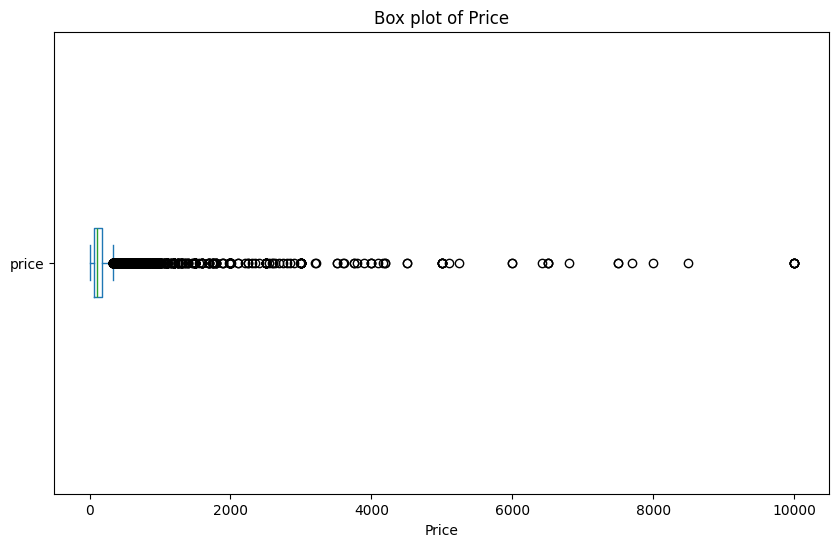

In [ ]:
# 1.3 Outlier Detection and Handling
plt.figure(figsize=(10,6))
df['price'].plot(kind='box', vert= False)
plt.title('Box plot of Price')
plt.xlabel('Price')
plt.show()

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
print(f"First Quartile (Q1): {Q1}")
print(f"Third Quartile (Q3): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")

First Quartile (Q1): 69.0
Third Quartile (Q3): 175.0
Interquartile Range (IQR): 106.0


In [ ]:
## This means that for our sample data, 25% of the prices are below 69.0, 75% are below 175.0, and the middle 50% of prices span a range of 106.0.

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Identifying outliers outside the range: ({lower_bound:.2f},{upper_bound:.2f})")

Identifying outliers outside the range: (-90.00,334.00)


In [ ]:
# Any price below the lower bound or above the upper bound is considered an outlier. Since price cannot be negative, we only need to look for prices above 334.


In [ ]:
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound) ]

In [ ]:
# let's see how much rows have been removed
print(df.shape[0],df_cleaned.shape[0])
rows_removed = df.shape[0] - df_cleaned.shape[0]
print(f"So total rows removed: {rows_removed}")

48858 45887
So total rows removed: 2971


In [ ]:
df_cleaned.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


1.4  Data Consistency
So for cleaning columns like name and host_name, the following strategy is used:
1. For removing leading/trailing spaces we can use `.str.strip()`
2. To convert everything to lowercase or title case depending on context `(.str.lower()` or `.str.title())`.

# 2. **Central Tendency and Visualization**

In [ ]:
# 2.1 Calculate Central Tendency
price_mean = df_cleaned['price'].mean()
price_median = df_cleaned['price'].median()
price_mode = df_cleaned['price'].mode()[0]
number_of_reviews_mean = df_cleaned['number_of_reviews'].mean()
number_of_reviews_median = df_cleaned['number_of_reviews'].median()
number_of_reviews_mode = df_cleaned['number_of_reviews'].mode()[0]

print(f"Mean Price: {price_mean:.2f}")
print(f"Median Price: {price_median:.2f}")
print(f"Mode Price: {price_mode:.2f}")
print(f"Mean Number of Reviews: {number_of_reviews_mean:.2f}")
print(f"Median Number of Reviews: {number_of_reviews_median:.2f}")
print(f"Mode Number of Reviews: {number_of_reviews_mode:.2f}")

Mean Price: 119.97
Median Price: 100.00
Mode Price: 100.00
Mean Number of Reviews: 23.94
Median Number of Reviews: 5.00
Mode Number of Reviews: 0.00


Since mean>median, hence the distribution will be right skewed so *Median* is a better representation of the typical price.

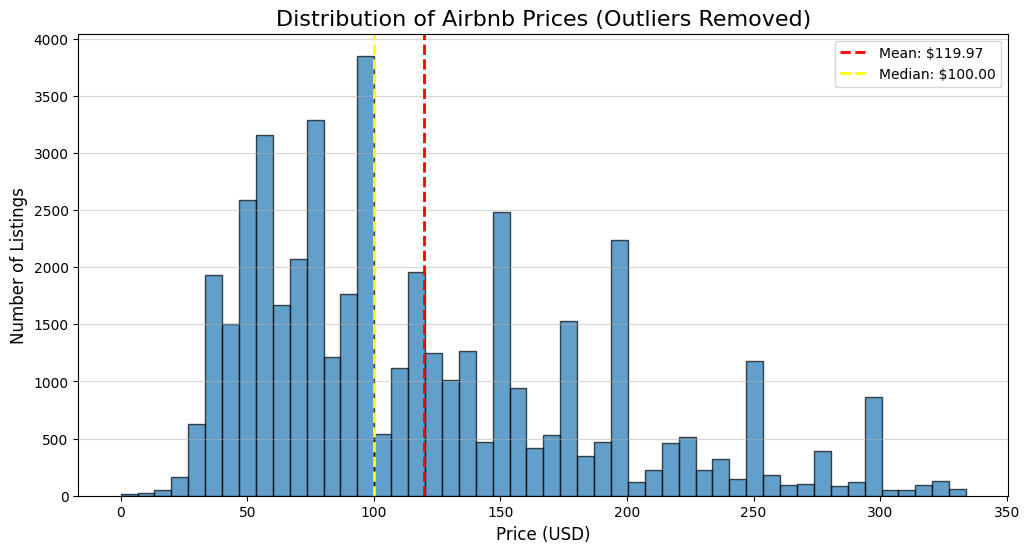

In [ ]:
# 2.3 Visualizations
plt.figure(figsize=(12, 6))
plt.hist(df_cleaned['price'], bins=50, edgecolor='black', alpha=0.7)
plt.axvline(price_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: ${price_mean:.2f}')
plt.axvline(price_median, color='yellow', linestyle='dashed', linewidth=2, label=f'Median: ${price_median:.2f}')
plt.title('Distribution of Airbnb Prices (Outliers Removed)', fontsize=16)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.5)

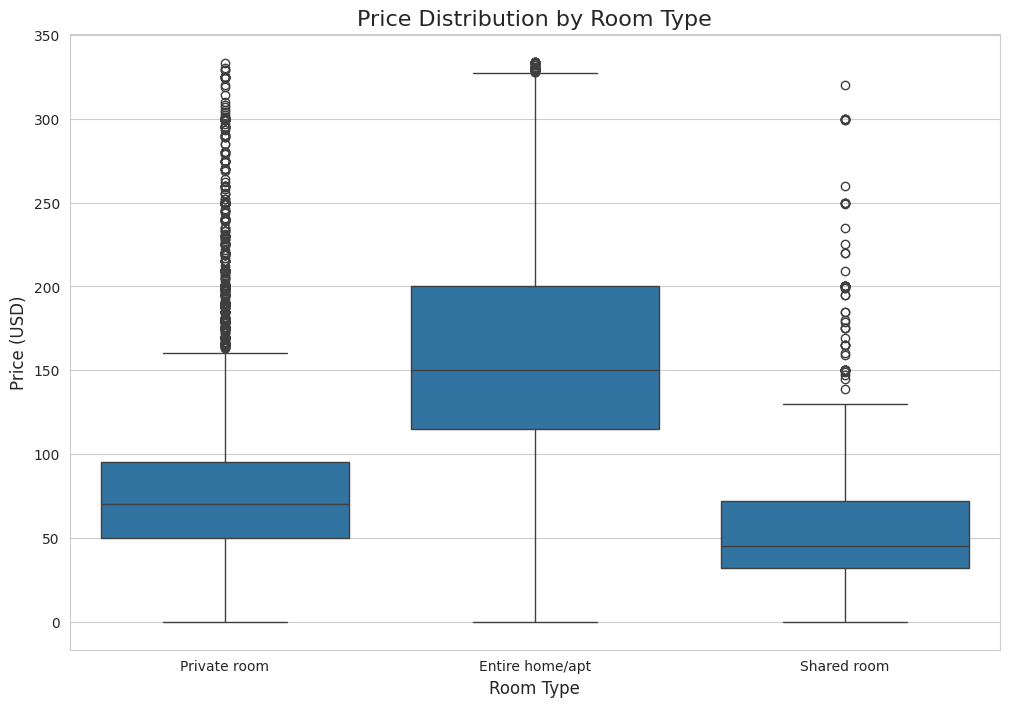

In [ ]:
# 2.3.2
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='room_type', y='price', data=df_cleaned)
plt.title('Price Distribution by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12);
plt.ylabel('Price (USD)', fontsize=12);


So it is not differing significantly, but it is differing a bit in private room and shared room!!

#3. **Sampling and the Central Limit Theorem(CLT)**

In [ ]:
# 3.1 Population Distribution:
population_mean = df_cleaned['calculated_host_listings_count'].mean()
print(f"The population mean of Host listings count is: {population_mean:.2f}")

The population mean of Host listings count is: 6.64


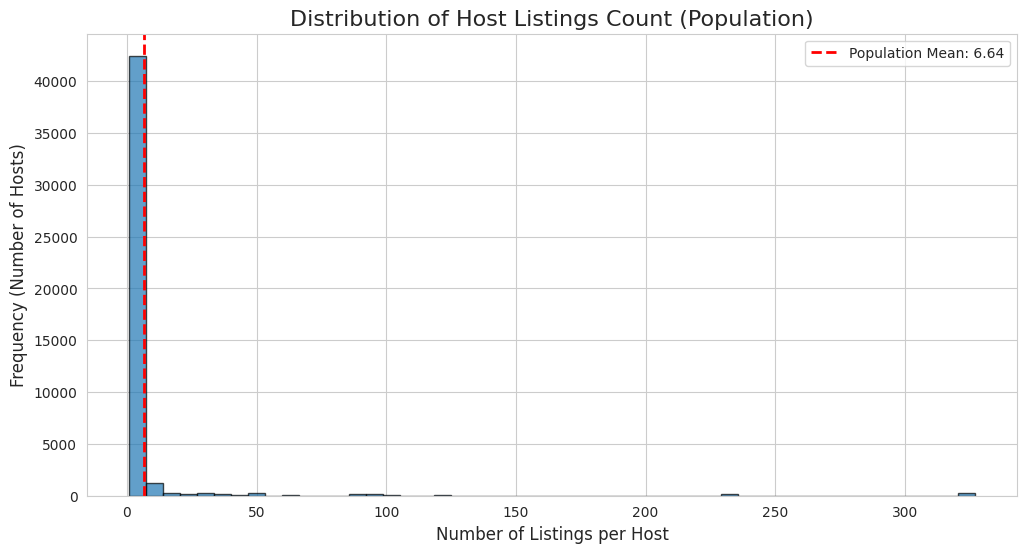

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.hist(df_cleaned['calculated_host_listings_count'], bins=50, edgecolor='black', alpha=0.7)
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label=f'Population Mean: {population_mean:.2f}')
plt.title('Distribution of Host Listings Count (Population)', fontsize=16)
plt.xlabel('Number of Listings per Host', fontsize=12)
plt.ylabel('Frequency (Number of Hosts)', fontsize=12);
plt.legend();

In [ ]:
# 3.2 Sampling Distribution:
population = df_cleaned['calculated_host_listings_count']
sample_means = []
num_samples = 1000
sample_size = 50
for i in range(num_samples):
    sample = population.sample(n=sample_size, replace=True)
    mean_of_sample = sample.mean()
    sample_means.append(mean_of_sample)

In [ ]:
len(sample_means)

1000

In [ ]:
print("the first 10 sample means calculated are:")
print(sample_means[:10])

the first 10 sample means calculated are:
[np.float64(12.2), np.float64(2.7), np.float64(10.74), np.float64(18.1), np.float64(2.12), np.float64(12.58), np.float64(5.98), np.float64(7.72), np.float64(6.42), np.float64(8.84)]


In [ ]:
# 3.3 visualize and verify  CLT:
mean_of_sample_means = pd.Series(sample_means).mean()
print(f"Original Population Mean: {population_mean:.4f}")
print(f"Mean of the 1000 Sample Means: {mean_of_sample_means:.4f}")

Original Population Mean: 6.6438
Mean of the 1000 Sample Means: 6.4452


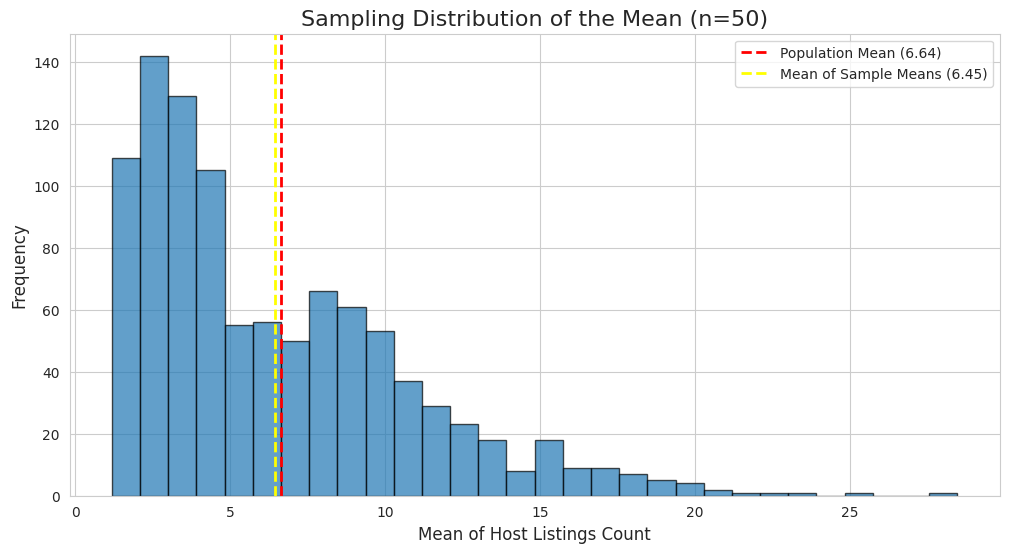

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
plt.hist(sample_means, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label=f'Population Mean ({population_mean:.2f})')
plt.axvline(mean_of_sample_means, color='yellow', linestyle='dashed', linewidth=2, label=f'Mean of Sample Means ({mean_of_sample_means:.2f})')

plt.title('Sampling Distribution of the Mean (n=50)', fontsize=16)
plt.xlabel('Mean of Host Listings Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend();

* So the shape of this new distribution looks approximately normal. It  have a clear bell shape, symmetric around a central peak. This is a dramatic change from the original population's histogram, which was heavily right-skewed.
* our findings demonstrate the Central Limit Theorem as:
1. The distribution of sample means is approximately normal, regardless of the original population's distribution.
2. The mean of the sample means is approximately equal to the true population mean.



# 4. **Hypothesis Testing**

4.1

H₀: μ₁ = μ₂

Hₐ: μ₁ ≠ μ₂

In [ ]:
# 4.2 Preparing data:
manhattan_prices = df_cleaned[df_cleaned['neighbourhood_group'] == 'Manhattan']['price']
brooklyn_prices = df_cleaned[df_cleaned['neighbourhood_group'] == 'Brooklyn']['price']

In [ ]:
# 4.3 & 4.4 Performing test and Interpreting the result
t_statistic, p_value = ttest_ind(manhattan_prices, brooklyn_prices, equal_var=False)
print("T-Test Results: ")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value}")
alpha = 0.05  # Standard significance level
print(f"Significance level (alpha): {alpha}")

if p_value < alpha:
    print("Conclusion: The p-value is less than the significance level.")
    print("We reject the null hypothesis (H0).")
    print("There is a statistically significant difference in the average prices between Manhattan and Brooklyn.")
else:
    print("Conclusion: The p-value is greater than the significance level.")
    print("We fail to reject the null hypothesis (H0).")
    print("There is not enough evidence to claim a significant difference in average prices.")

T-Test Results: 
T-statistic: 60.2242
P-value: 0.0
Significance level (alpha): 0.05
Conclusion: The p-value is less than the significance level.
We reject the null hypothesis (H0).
There is a statistically significant difference in the average prices between Manhattan and Brooklyn.


# 5. **Advanced Pandas Operations**

In [ ]:
# 5.1 Data Selection and Performance
# method 1 (Boolean Indexing)
condition1 = df_cleaned['neighbourhood_group'] == 'Bronx'
condition2 = df_cleaned['price'] < 100
condition3 = df_cleaned['number_of_reviews'] > 10
bronx_filtered = df_cleaned[condition1 & condition2 & condition3]
bronx_filtered.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323
433,149777,Artsy 1 bedroom Apt. 20 min to 42nd Grand Cent...,716306,"Dee, Dre & Mama Shelley",Bronx,Woodlawn,40.89747,-73.86390,Entire home/apt,77,1,197,2.49,1,309
484,169306,Affordable & Cozy,806214,Vanessa,Bronx,University Heights,40.85811,-73.90675,Private room,37,4,117,1.21,1,232
557,206071,Yankee Stadium Oasis 2 stops to Manhattan!,12221,Lori,Bronx,Concourse Village,40.82802,-73.92039,Private room,50,3,258,2.70,2,276


In [ ]:
# method 2 (using .query() method)
bronx_filtered = df_cleaned.query("neighbourhood_group == 'Bronx' and price < 100 and number_of_reviews > 10")
bronx_filtered.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323
433,149777,Artsy 1 bedroom Apt. 20 min to 42nd Grand Cent...,716306,"Dee, Dre & Mama Shelley",Bronx,Woodlawn,40.89747,-73.86390,Entire home/apt,77,1,197,2.49,1,309
484,169306,Affordable & Cozy,806214,Vanessa,Bronx,University Heights,40.85811,-73.90675,Private room,37,4,117,1.21,1,232
557,206071,Yankee Stadium Oasis 2 stops to Manhattan!,12221,Lori,Bronx,Concourse Village,40.82802,-73.92039,Private room,50,3,258,2.70,2,276


In [ ]:
# 5.2 Hierarchical Indexing and Aggregation:
grouped_data = df_cleaned.groupby(['neighbourhood_group', 'room_type']).agg(
    average_price=('price', 'mean'),
    total_reviews=('number_of_reviews', 'sum')
)
print(grouped_data.round(2))
most_expensive = grouped_data.sort_values('average_price', ascending=False).index[0]
print(f"Most expensive combination on average: {most_expensive[0]} - {most_expensive[1]}")

                                     average_price  total_reviews
neighbourhood_group room_type                                    
Bronx               Entire home/apt         112.30          11405
                    Private room             60.60          16312
                    Shared room              45.83            431
Brooklyn            Entire home/apt         148.22         256534
                    Private room             70.29         213211
                    Shared room              48.04           5791
Manhattan           Entire home/apt         181.65         209589
                    Private room             98.07         207870
                    Shared room              75.94          10241
Queens              Entire home/apt         131.33          59646
                    Private room             65.74          93301
                    Shared room              46.99           2724
Staten Island       Entire home/apt         121.09           5852
          

In [ ]:
# 5.3 Vectorized Operations (Applying a Function):
def categorize_availability(days):
    if days == 0:
        return 'Low'
    elif 1 <= days <= 180:
        return 'Medium'
    else:
        return 'High'




In [ ]:
df_cleaned['availability_category'] = df_cleaned['availability_365'].apply(categorize_availability)


In [ ]:
print(df_cleaned[['availability_category']].head())

  availability_category
0                  High
1                  High
2                  High
3                  High
4                   Low


In [ ]:
# 5.4 High-Performance Calculation with eval():
df_cleaned['reviews_per_month'].fillna(0, inplace=True)

df_cleaned['review_score'] = (
    df_cleaned['reviews_per_month'] * df_cleaned['number_of_reviews']
) / (df_cleaned['minimum_nights'] + 1)

print(df_cleaned[['review_score', 'reviews_per_month', 'number_of_reviews', 'minimum_nights']].head())


   review_score  reviews_per_month  number_of_reviews  minimum_nights
0      0.945000               0.21                  9               1
1      8.550000               0.38                 45               1
2      0.000000               0.00                  0               3
3    626.400000               4.64                270               1
4      0.081818               0.10                  9              10


/tmp/ipython-input-2645835301.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['reviews_per_month'].fillna(0, inplace=True)
/tmp/ipython-input-2645835301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['reviews_per_month'].fillna(0, inplace=True)
/tmp/ipython-input-2645835301.py:4: SettingWithCopyWarning: 
A value 